In [159]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [160]:
# def fn(whalls):
#     return np.sum(whalls**2, axis=1)

# def fn(x):
#     n = x.shape[1]  
#     return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x), axis=1)

# def fn(x):
#     n = x.shape[1]  # Number of dimensions
#     sum1 = np.sum(x**2, axis=1) / n
#     sum2 = np.sum(np.cos(2 * np.pi * x), axis=1) / n
#     return -20 * np.exp(-0.2 * np.sqrt(sum1)) - np.exp(sum2) + 20 + np.e

# def fn(x):
#     return np.sum(100 * (x[:, 1:] - x[:, :-1]**2)**2 + (x[:, :-1] - 1)**2, axis=1)

def fn(x):
    sum_term = np.sum(x**2, axis=1) / 4000
    prod_term = np.prod(np.cos(x / np.sqrt(np.arange(1, x.shape[1] + 1))), axis=1)
    return 1 + sum_term - prod_term

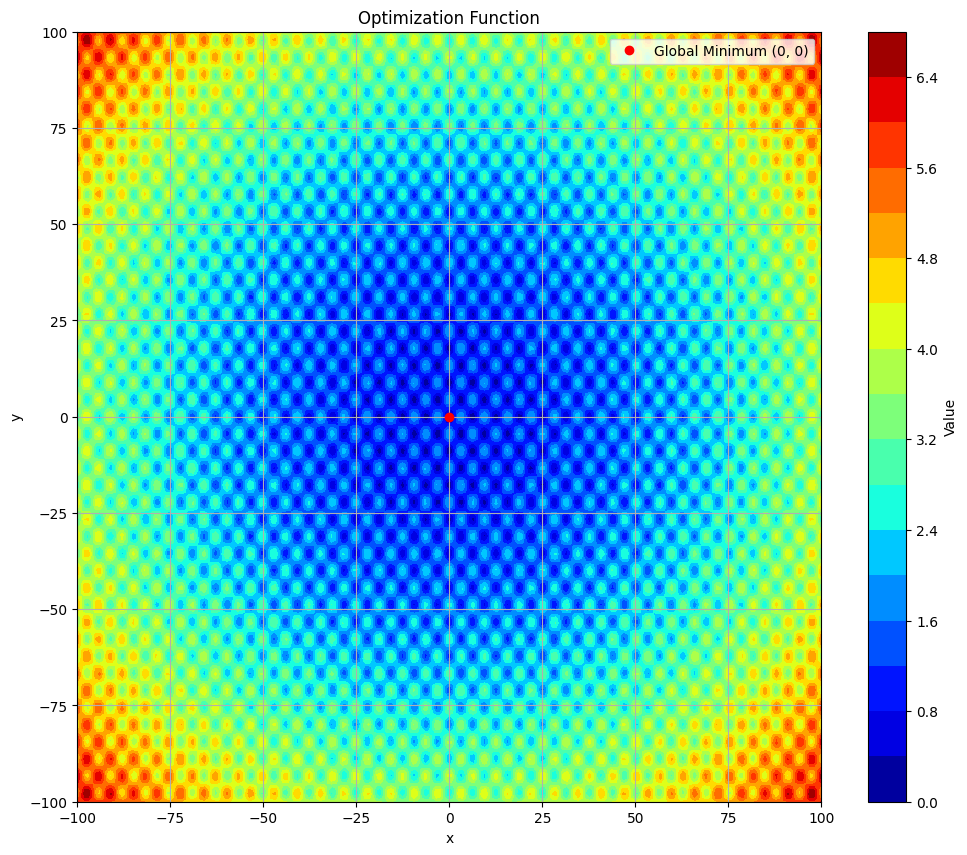

In [161]:

x = np.linspace(-100, 100, 200)
y = np.linspace(-100, 100, 200)
X, Y = np.meshgrid(x, y)
whales = np.column_stack([X.ravel(), Y.ravel()])  
Z = fn(whales).reshape(X.shape)

plt.figure(figsize=(12, 10))
contourf = plt.contourf(X, Y, Z, levels=20, cmap='jet')
plt.colorbar(contourf, label='Value')
plt.title('Optimization Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(0, 0, 'ro', label='Global Minimum (0, 0)') 
plt.legend()
plt.show()

In [162]:
def WOA(n_whale, dim, iter,xMin,xMax):
    whales = np.random.uniform(xMin, xMax, (n_whale, dim))
    
    cost = fn(whales)
    sorted_idx = np.argsort(cost)
    best = whales[sorted_idx[0]]
    
    whales_path = [whales.copy()]  
    b = 1  
    
    for it in range(iter):
        a = 2 - it * (2 / iter)  
        for j in range(len(whales)):  
            r = np.random.rand()
            p = np.random.rand()
            A = 2 * a * r - a
            C = 2 * r

            if p < 0.5:
                if np.abs(A) < 1:
                    D = np.abs(C * best - whales[j])
                    whales[j] = best - A * D
                else:
                    idx = np.random.randint(0, len(whales))
                    D = np.abs(C * whales[idx] - best)
                    whales[j] = whales[idx] - A * D
            else:
                D = best - whales[j]
                l = np.random.uniform(-1, 1)
                whales[j] = best + D * np.exp(b * l) * np.cos(2 * np.pi * l)

            whales[j] = np.clip(whales[j], xMin, xMax)

        cost = fn(whales)
        sorted_idx = np.argsort(cost)
        best = whales[sorted_idx[0]]
        
        whales_path.append(whales.copy()) 
    
    return best, cost[sorted_idx[0]], whales_path 


In [163]:
def create_gif(path,xMin,xMax, filename="whale_movement.gif"):
    frames = []
    x = np.linspace(xMin,xMax, 200)
    y = np.linspace(xMin,xMax, 200)
    X, Y = np.meshgrid(x, y)
    whales = np.column_stack([X.ravel(), Y.ravel()])  
    Z = fn(whales).reshape(X.shape)


    for i, whales in enumerate(path):
        fig, ax = plt.subplots(figsize=(10, 8))
        contourf = ax.contourf(X, Y, Z, levels=20, cmap='jet')
        ax.scatter(whales[:, 0], whales[:, 1], color='white', edgecolors='black', label='Whales')
        ax.scatter(0, 0, c='red', label='Global Min (0,0)', marker='X', s=100)
        ax.set_title(f'Whale Optimization - Iteration {i+1}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend()
        ax.grid(True)
        plt.colorbar(contourf, ax=ax, label='Value')
        plt.tight_layout()

        fig.canvas.draw()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        frames.append(Image.fromarray(img))
        if i != len(path)-1:
            plt.close(fig) 

    if frames:
        frames[0].save(filename, save_all=True, append_images=frames[1:], duration=100, loop=0)


Best Solution: [-6.11380209e-09  2.49518025e-09], Fitness: 0.0


C:\Users\ali0a\AppData\Local\Temp\ipykernel_22848\272088579.py:24: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


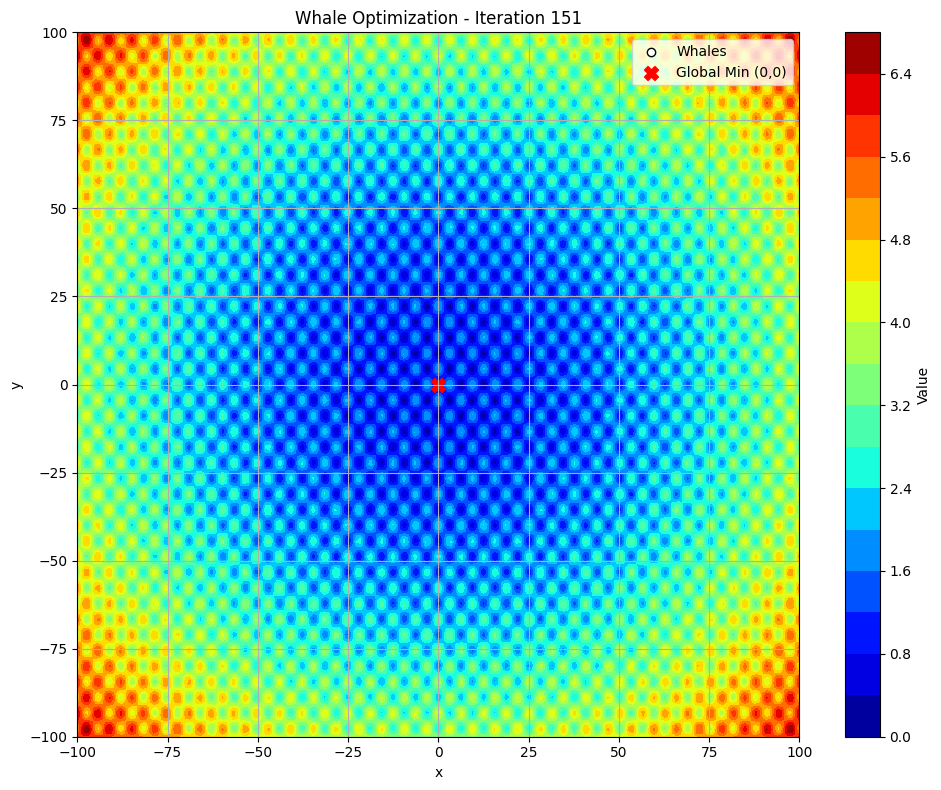

In [164]:
xMin,xMax = -100,100
best_solution, best_cost, whales_path = WOA(10, 2, 150,xMin,xMax)
print(f"Best Solution: {best_solution}, Fitness: {best_cost}")
create_gif(whales_path,xMin,xMax,filename="whale_movement.gif")
